# 17143번 낚시왕 - Gold 2

#### 알고리즘 분류 :  구현 , 시뮬레이션


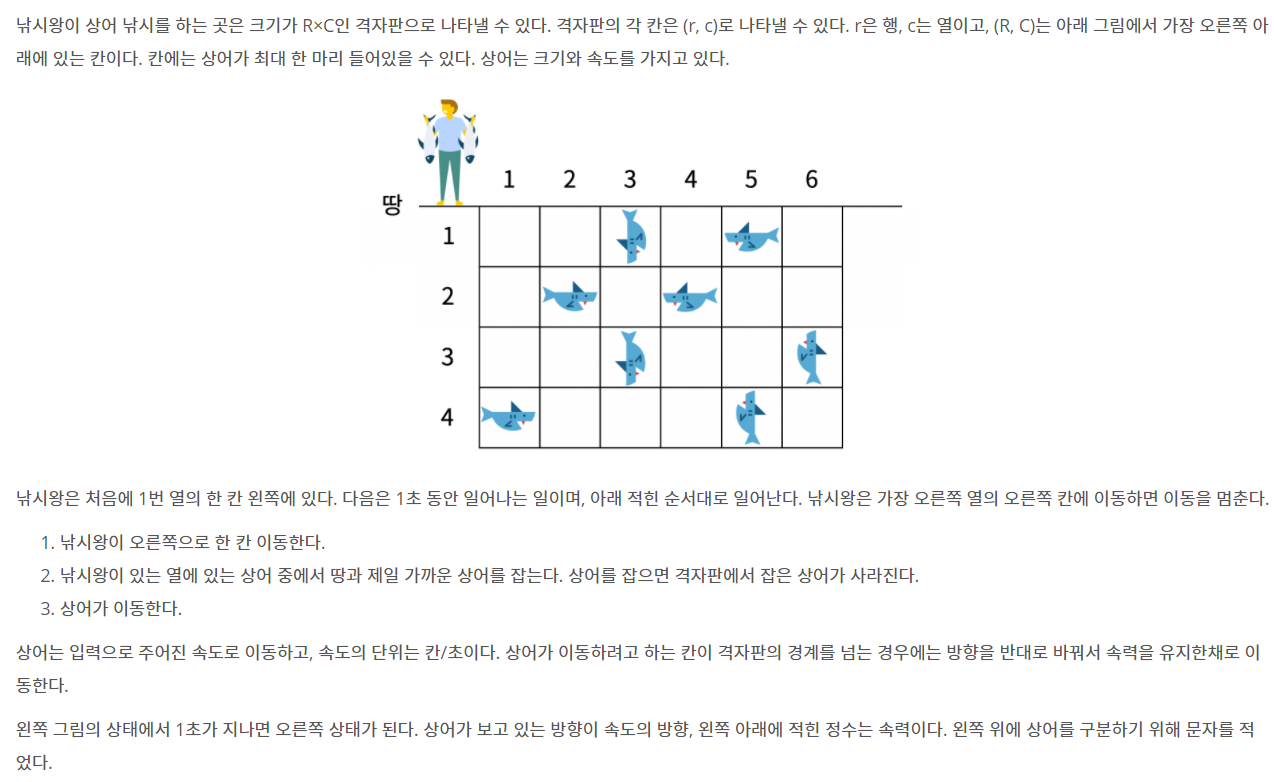
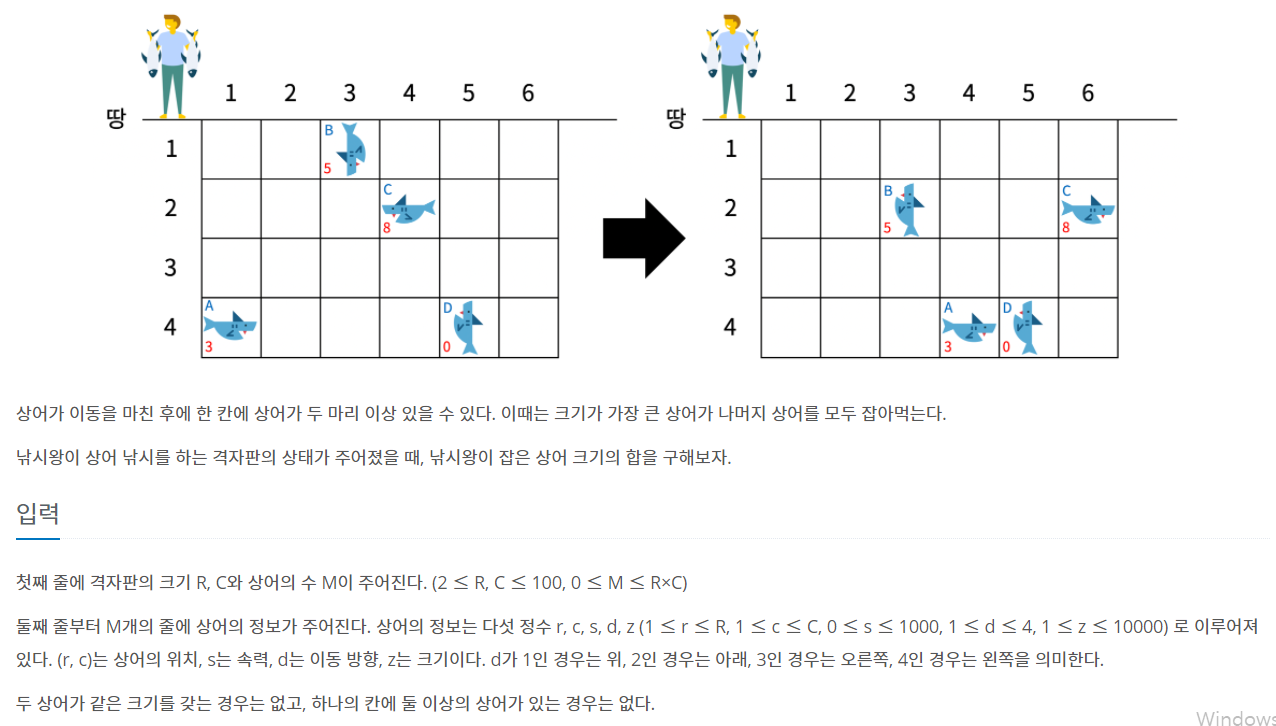

In [ ]:
R,C,M = map(int,input().split())
graph = [[0]*C for _ in range(R)]
for i in range(M):

    r,c,s,d,z = map(int,input().split())

    graph[r-1][c-1]=[s,d,z]

answer= 0

direction = [0,[-1,0],[1,0],[0,1],[0,-1]]
reverse_direction = {1:2,2:1,3:4,4:3}
def catch_shark(sec):
    global answer
    for i in range(R):

        if graph[i][sec]:
            answer += graph[i][sec][2]
            graph[i][sec] = 0
            return


def shark_move(graph):

    next_graph =  [[0]*C for _ in range(R)]
    for i in range(R):
        for j in range(C):
            if graph[i][j]:

                s,d,z = graph[i][j]
                dy, dx = direction[d]
                if s==0:
                    if not next_graph[i][j]:
                        next_graph[i][j] = [s,d,z]
                        continue
                    else:
                        if next_graph[i][j][2] > z:
                            continue
                        else:
                            next_graph[i][j] = [s,d,z]
                            continue

                for idx in range(s):

                    if idx== 0:
                        if 0<=i+dy < R and 0<=j+dx<C:
                            ny,nx= i+dy , j+dx
                        else:
                            ny = i - dy
                            nx = j - dx
                            dy,dx = -dy , -dx
                            d = reverse_direction[d]

                    else:
                        if 0<=ny+dy < R and 0<=nx+dx <C:
                            ny+= dy
                            nx+= dx
                        else:
                            ny -=  dy
                            nx -= dx
                            dy,dx = -dy , -dx
                            d = reverse_direction[d]
                if not next_graph[ny][nx]:
                    next_graph[ny][nx] = [s,d,z]
                else:
                    if next_graph[ny][nx][2] > z:
                        continue
                    else:
                        next_graph[ny][nx] = [s,d,z]
    return next_graph


def solve():
    global graph
    for i in range(C):
        catch_shark(i)
        graph = shark_move(graph)
    print(answer)

solve()